In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv("economic_index.csv")
data.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.drop("year",axis=1,inplace=True)
data.drop("month",axis=1,inplace=True)

In [5]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

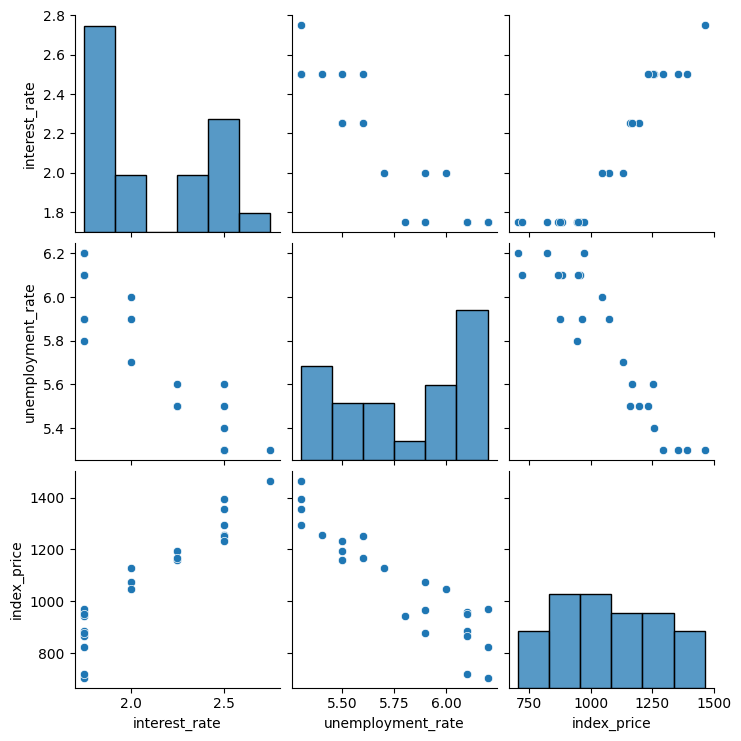

In [7]:
sns.pairplot(data)

In [8]:
data.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
x_train=data.iloc[:,:-1]
y_train=data.iloc[:,-1]

In [10]:
x_train

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [11]:
y_train




0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [15]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [16]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

model=regression.fit(x_train,y_train)

In [17]:
from sklearn.model_selection import cross_val_score

validation_score=cross_val_score(model,x_train,y_train,scoring="neg_mean_squared_error",cv=5)

In [18]:
np.mean(validation_score)

np.float64(-5649.115244350756)

In [19]:
pridected_value=model.predict(x_test)

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mse=mean_squared_error(y_test,pridected_value)
mae=mean_absolute_error(y_test,pridected_value)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [21]:
from sklearn.metrics import r2_score

score=r2_score(y_test,pridected_value)
score

0.7591371539010257

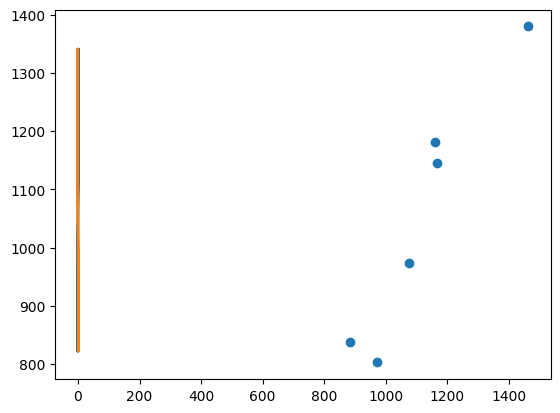

In [25]:
plt.scatter(y_test,pridected_value)
plt.plot(x_train,model.predict(x_train))